<a href="https://colab.research.google.com/github/Shivam1603/machine-learning-concepts/blob/main/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collect and import the relevant packages

In [3]:
!pip install mnist

In [33]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

**Steps to Perform:**
1. Import the dataset
2. Preprocess the dataset, normalize the images and make sure the shape is correct to be fed into a CNN using Keras
3. Build the model
4. Compile the model
5. Training/Fit the model
6. Evaluate the model

In [22]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
## Preprocessing the dataset

# Normalization
x_train = x_train / 255.
x_test = x_test / 255.

# Expanding dimension of the grayscale image from 28x28 to 28x28x1
x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

In [25]:
# Build the model
# We will build a simple model using one Conv2D + one MaxPool2D + Flatten + Softmax layers

model = Sequential()
model.add(Conv2D(32, 3))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [29]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Fit the model
model.fit(x_train, to_categorical(y_train), epochs = 10, validation_data = (x_test, to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2647 - accuracy: 0.9239 - val_loss: 0.1352 - val_accuracy: 0.9604
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1168 - accuracy: 0.9665 - val_loss: 0.0937 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0845 - accuracy: 0.9755 - val_loss: 0.0917 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0687 - accuracy: 0.9791 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9824 - val_loss: 0.0717 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.0687 - val_accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0706 - val_accuracy

The number of params for the first conv layer is calculated as follows = num_params_in_one_filter * num_filters
Since, num_filters = 32 and
num_params_in_one_filter = (3 x 3 x 1 + 1) = 32 where (3x3x1) is the filter size for a grayscale filter and +1 is for the bias value.

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


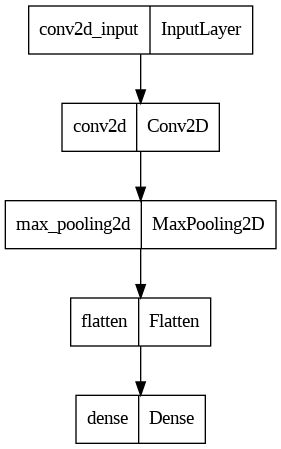

In [34]:
plot_model(model)

In [43]:
# Evaluate the model
prediction_on_the_first_test_image = model.predict(x_test[:1])

print(np.argmax(prediction_on_the_first_test_image, axis = 1))

1/1 [==============================] - 0s 19ms/step
[7]


(1, 28, 28, 1)